In [4]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

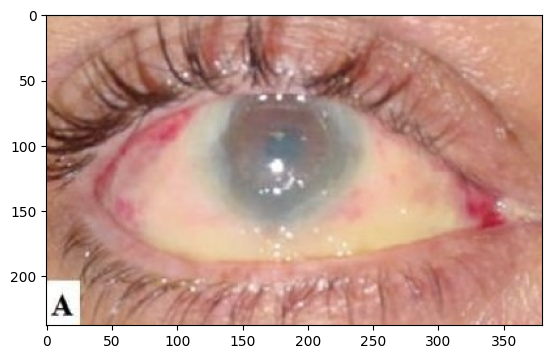

In [6]:
image = EyeTraumaAnalysis.Image("data/01_raw/00001_li.jpg")
plt.imshow(image.img);

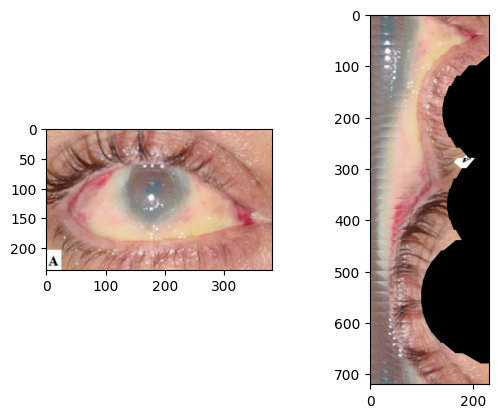

In [7]:
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=20,
    center=image.center, side_left=False)

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(np.vstack([segment for ind,segment in segments.items()]));


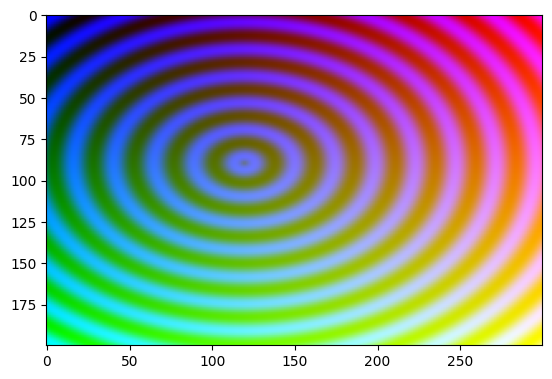

In [12]:
def multiply_tuples(xs,ys):
    return tuple(x*y for x,y in zip(xs,ys))
# Create test_image
test_img_shape = (200,300)
test_img_center_rel = (0.4, 0.45)  # relative
x = np.linspace(0, 1, test_img_shape[1])   # linspace is inclusive of the endpoints.  It is from 0 to 1 inclusive
y = np.linspace(0, 1, test_img_shape[0])
xgrid, ygrid = np.meshgrid(x, y)
distance_to_center = np.sqrt((xgrid-test_img_center_rel[0])**2+(ygrid-test_img_center_rel[1])**2)
distance_to_center = distance_to_center/np.max(distance_to_center)  # normalize from 0 to 1 inclusive
# radial_symmetry*10 % 255
test_img = EyeTraumaAnalysis.Image(
    img=np.stack( [
        255*xgrid,  # blue color values
        255*ygrid,  # blue color values
        255*(0.5+0.5*np.sin(10*distance_to_center*2*np.pi)),  # blue color values
        ], axis=2),
    center=multiply_tuples(test_img_shape,test_img_center_rel),
)
test_img.img = test_img.img.astype(np.uint8)
plt.imshow(test_img.img);

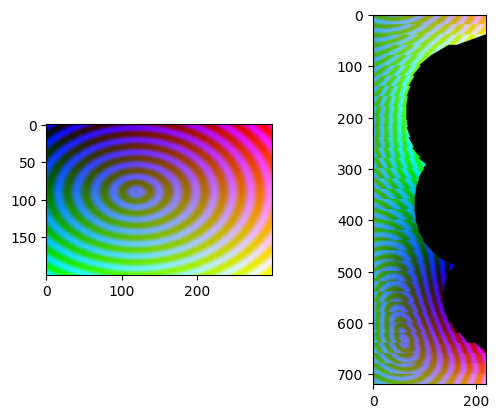

In [13]:
segments = EyeTraumaAnalysis.get_segments(
    img=test_img.img,
    interval_deg=10,
    wd_px=20,
    center=test_img.center, side_left=False)

fig, axs = plt.subplots(1,2)
axs[0].imshow(test_img.img);
axs[1].imshow(np.vstack([segment for ind,segment in segments.items()]));